In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df = pd.read_csv("new_dataset_picu_laura.csv")

In [17]:


numerical_columns = [
    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr",
    "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars",
    "GarageArea", "SalePrice"
]



In [16]:
print(numerical_columns)

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


# * I selected the numerical columns manually, but i doublechecked using numerical_columns = df.select_dtypes(include='number').columns and also triple checked by using summary() over new_dataset in R.


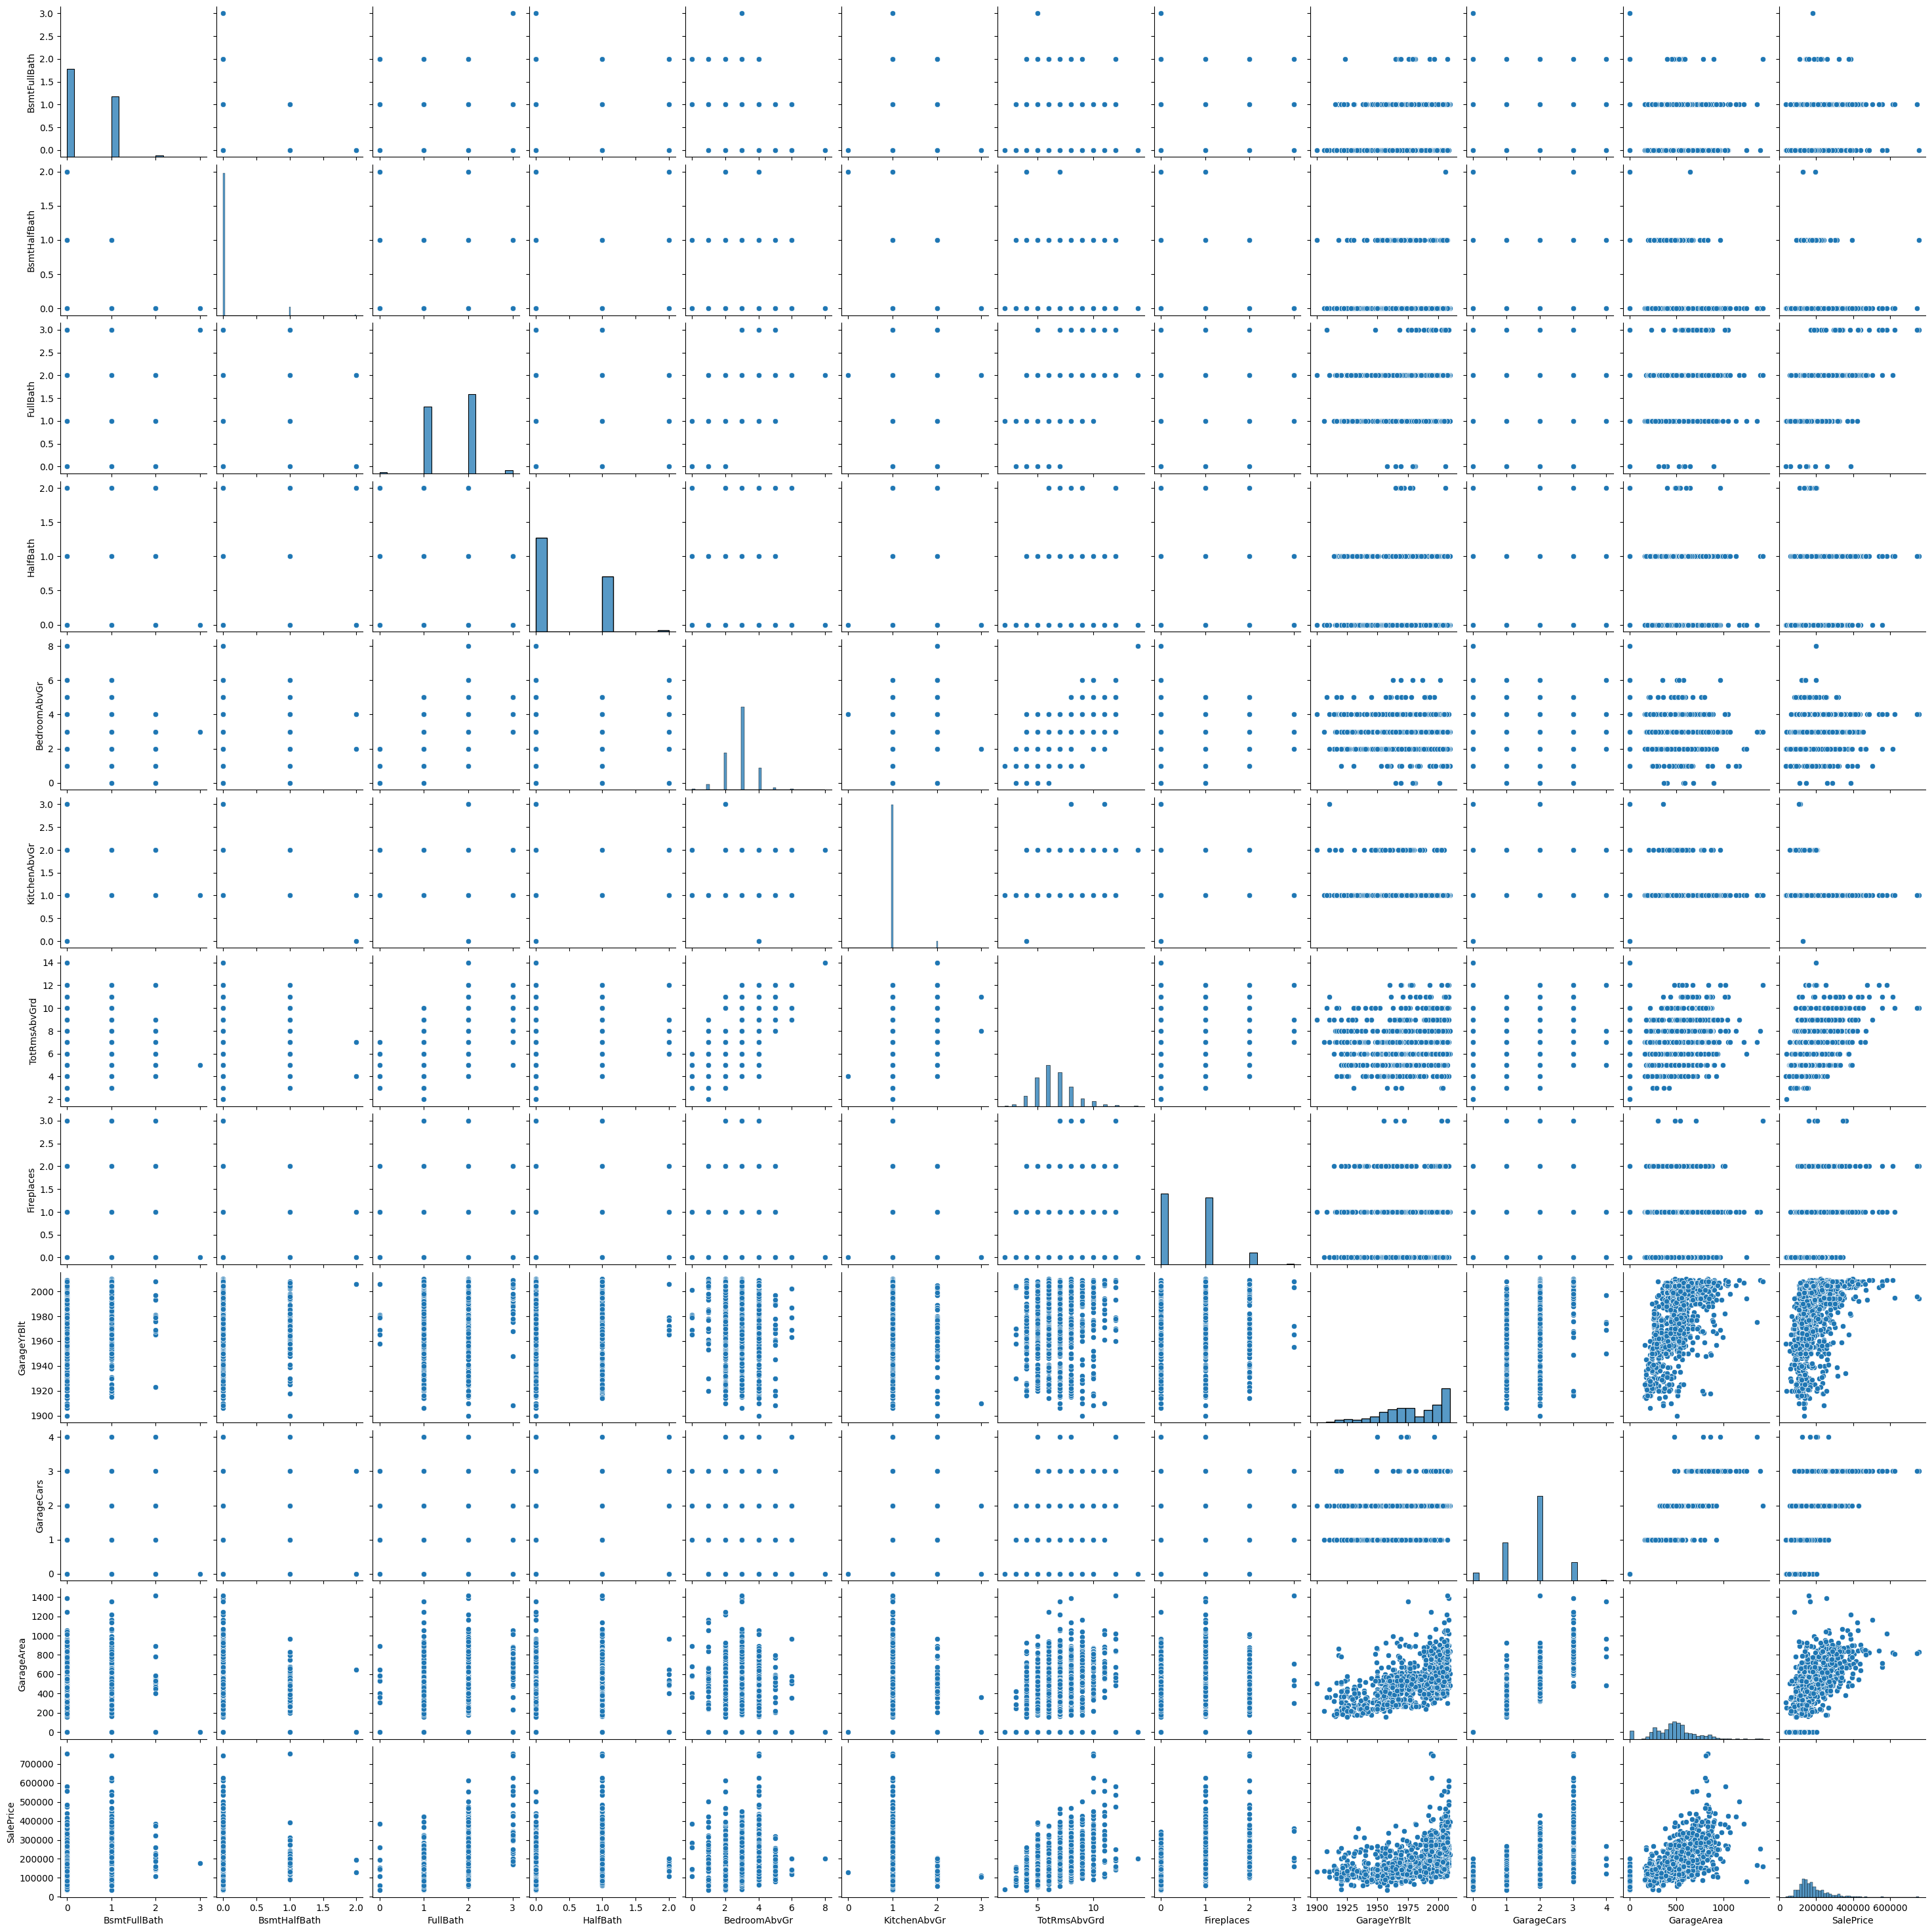

In [28]:
sns.pairplot(df[numerical_columns])
plt.show()

Observations: 
SalePrice and GarageYrBlt seem to have an almost vertical linearity, which doesn't make GarageYrBlt a great fit.


SalePrice and GarageArea seem to have linearity, although it is a stretch. I chose these two.


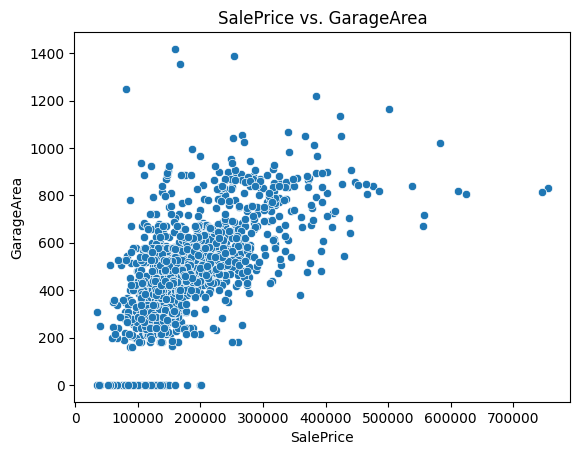

In [35]:
sns.scatterplot(data=df[numerical_columns], x="SalePrice", y="GarageArea")
plt.title("SalePrice vs. GarageArea")
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [41]:

selected_columns = [
     "SalePrice", "GarageArea"
]
train_df[selected_columns]


,SalePrice,GarageArea
254,145000,294
1066,178000,380
638,85000,0
799,175000,240
380,127000,308
...,...,...
1095,176432,440
1130,135000,576
1294,115000,572
860,189950,216


In [42]:
X_train = train_df[selected_columns].drop('SalePrice', axis=1)  
y_train = train_df['SalePrice']                                

X_test = test_df[selected_columns].drop('SalePrice', axis=1)   
y_test = test_df['SalePrice']  

In [43]:
from statsmodels.formula.api import ols

In [48]:
ols_data = df[["SalePrice", "GarageArea"]]


In [49]:
ols_data.head(10)

,SalePrice,GarageArea
0,208500,548
1,181500,460
2,223500,608
3,140000,642
4,250000,836
5,143000,480
6,307000,636
7,200000,484
8,129900,468
9,118000,205


In [50]:
ols_formula = "SalePrice ~ GarageArea"


In [51]:
OLS = ols(formula = ols_formula, data = ols_data)


In [52]:
OLS = ols(formula = ols_formula, data = ols_data)

model = OLS.fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Sat, 18 Oct 2025   Prob (F-statistic):          5.27e-158
Time:                        18:25:19   Log-Likelihood:                -18185.
No. Observations:                1460   AIC:                         3.637e+04
Df Residuals:                    1458   BIC:                         3.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.136e+04   3949.003     18.070      0.000    6.36e+04    7.91e+04
GarageArea   231.6456      7.608     30.446      0.000     216.721     246.570
==============================================================================
Omnibus:                      562.790   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5197.079
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='SalePrice', ylabel='GarageArea'>

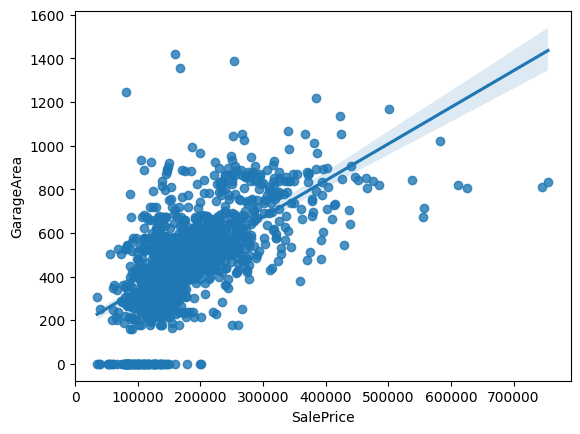

In [55]:
sns.regplot(x = "SalePrice", y = "GarageArea", data = ols_data)


In [56]:
ols_formula = "SalePrice ~ GarageArea"
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()


residuals = model.resid



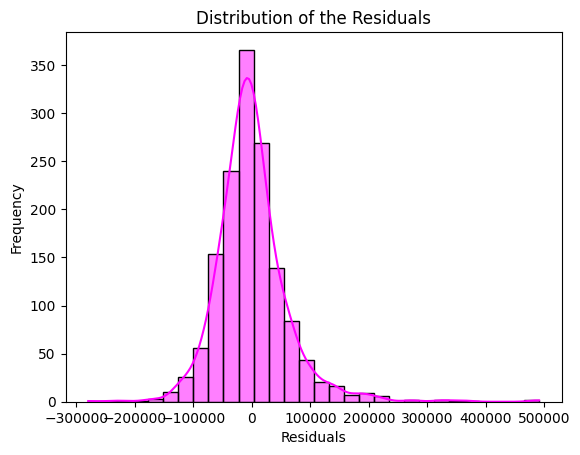

In [57]:
sns.histplot(residuals, kde=True, color="magenta", bins=30)
plt.title("Distribution of the Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [59]:
fitted_values = model.predict(ols_data)


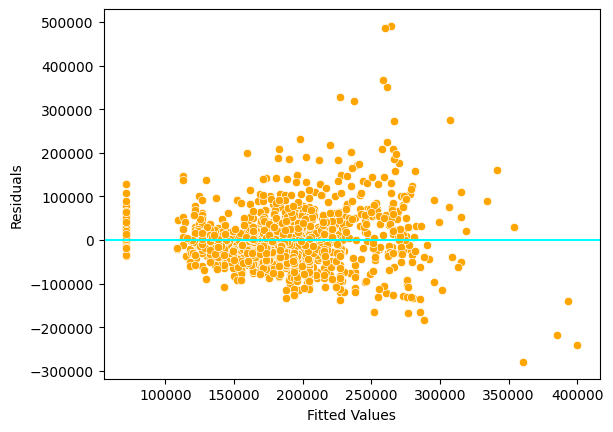

In [61]:


fig = sns.scatterplot(x=fitted_values, y=residuals, color ="orange")

fig.axhline(0, color="cyan")


fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

plt.show()


